# **K-Nearest Neighbors**

O **KNN** é um algoritmo simples e **supervisionado** de aprendizado de máquina (ML) que pode ser usado para tarefas de **classificação ou regressão** - e também é frequentemente usado na imputação de valores ausentes. Baseia-se na ideia de que as observações mais próximas de um determinado ponto de dados são as observações mais "semelhantes" em um conjunto de dados, e podemos, portanto, **classificar pontos imprevistos com base nos valores dos pontos existentes mais próximos**. Ao escolher K, o usuário pode selecionar o número de observações próximas a serem usadas no algoritmo.

É considerado um aprendizado supervisionado por conta de ser fornecido os valores das classes dos pontos. Este pode ser utilizado em conjunto com o algoritmo não supervisionado **K-means**, o qual realiza a calssificação dos pontos de um conjunto baseado nas suas features e suas similaridades. Isso pode ser feito, pois, em muitos casos, não se tem os dados devidamente rotulados, os quais podem ser pré-definidos por esse algoritmo, sendo uma etapa de pré-processamento.

## **Exemplo**

Utilizando o algoritmo de KNN para classificação de um novo ponto do dataset, baseado nos k vizinhos mais próximos.

In [8]:
# Importando as bibliotecas necessárias
import matplotlib.pyplot as plt
import numpy as np

from sklearn.neighbors import KNeighborsClassifier

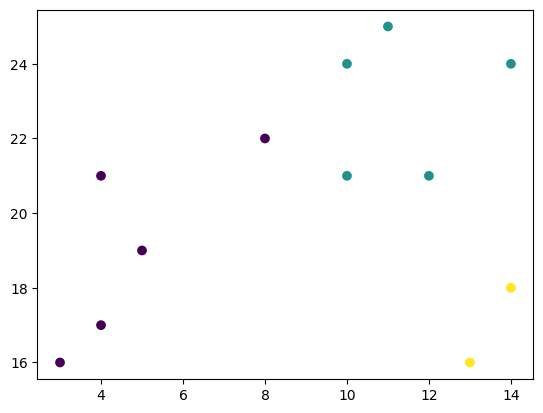

In [9]:
# Criando o dataset e verificando seu comportamento no gráfico
X = [4, 5, 10, 4, 3, 11, 13, 14, 14, 8, 10, 12]
y = [21, 19, 24, 17, 16, 25, 16, 18, 24, 22, 21, 21]
classes = [0, 0, 1, 0, 0, 1, 2, 2, 1, 0, 1, 1]

plt.scatter(X, y, c=classes)
plt.show()

In [10]:
# Cria-se os pares de valores X e y 
data = list(zip(X, y))

# Instância do knn para 1 vizinho mais próximo
knn = KNeighborsClassifier(n_neighbors=1)

# Treinamento do modelo
knn.fit(data, classes) 

KNeighborsClassifier(n_neighbors=1)

[0 1 2]


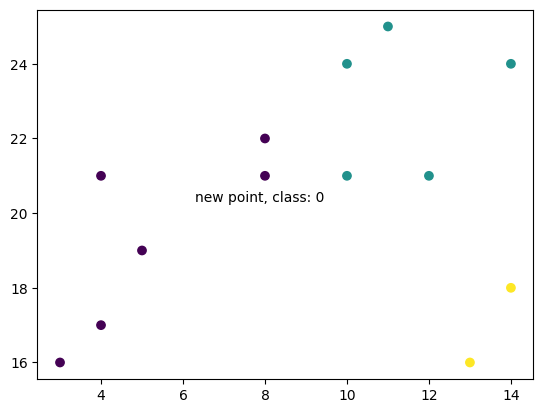

In [11]:
# Predição de um novo ponto no conjunto e verificando os para qual classe este irá pertencer
new_x = 8
new_y = 21
new_point = [(new_x, new_y)]

prediction = knn.predict(new_point)

print(knn.classes_)

plt.scatter(X + [new_x], y + [new_y], c=classes + [prediction[0]])
plt.text(x=new_x-1.7, y=new_y-0.7, s=f"new point, class: {prediction[0]}")
plt.show()

**Alterando número de vizinhos mais próximos para 5.**

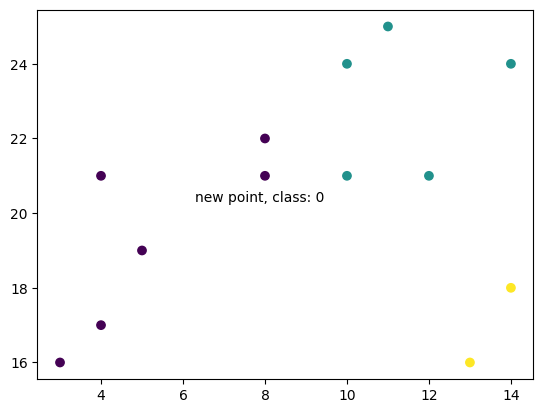

In [12]:
# Alterando o número de vizinhos mais próximos
knn = KNeighborsClassifier(n_neighbors=5)

# Treinando novamente o modelo
knn.fit(data, classes)

# Prevendo um novo ponto para k = 5
prediction = knn.predict(new_point)

plt.scatter(X + [new_x], y + [new_y], c=classes + [prediction[0]])
plt.text(x=new_x-1.7, y=new_y-0.7, s=f"new point, class: {prediction[0]}")
plt.show() 

## **Criando a curva de resposta do modelo para n valores de vizinhos próximos**

In [19]:
# Cria o vetor que varia de 1 a 12 (1 a 12 vizinhos mais próximos)
neighbors = np.arange(1, 13)
train_accuracies = {}

for neighbor in neighbors:
    # Cria o classifcador
    knn = KNeighborsClassifier(n_neighbors=neighbor)
  
    # Treina o modelo
    knn.fit(data, classes)
  
    # Calcula a precisão do modelo baseao nos dados de treinamento
    train_accuracies[neighbor] = knn.score(data, classes)
    
print(train_accuracies)

{1: 1.0, 2: 1.0, 3: 0.9166666666666666, 4: 0.8333333333333334, 5: 0.75, 6: 0.75, 7: 0.75, 8: 0.75, 9: 0.75, 10: 0.75, 11: 0.75, 12: 0.4166666666666667}


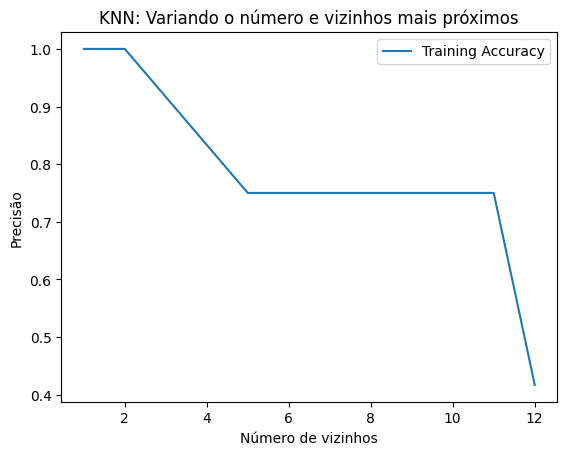

In [18]:
plt.title("KNN: Variando o número e vizinhos mais próximos")

# Plota as precisões de treinamento
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")

plt.legend()
plt.xlabel("Número de vizinhos")
plt.ylabel("Precisão")

# Exibe o gráfico
plt.show()